In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import json

### Fixture data

In [2]:
GW_TILL = 19

In [3]:
with open('fixtures_data.json','r') as f:
    fixtures_data = json.load(f)
fixtures_data = pd.DataFrame(fixtures_data)

In [4]:
fixtures_data['datetime'] = pd.to_datetime(fixtures_data['datetime'])


In [5]:
fixtures_data['h'] = fixtures_data['h'].apply(lambda x: x['title'])
fixtures_data['a'] = fixtures_data['a'].apply(lambda x: x['title'])
fixtures_data['h_goals'] = fixtures_data['goals'].apply(lambda x: x['h'])
fixtures_data['a_goals'] = fixtures_data['goals'].apply(lambda x: x['a'])

fixtures_data['h_xG'] = fixtures_data['xG'].apply(lambda x: x['h'])
fixtures_data['a_xG'] = fixtures_data['xG'].apply(lambda x: x['a'])

In [6]:
fixtures_data = fixtures_data[['id', 'datetime', 'isResult', 'h','a', 'h_goals', 'a_goals', 'h_xG', 'a_xG']]

for var in ['h_goals','a_goals', 'h_xG','a_xG']:
    fixtures_data[var] = fixtures_data[var].astype(np.float32)

In [7]:
fixtures_data.shape

(380, 9)

In [8]:
## Hard coded due to errors
last_till = GW_TILL*10 - 1
check_post_data = fixtures_data[last_till:]
fixtures_data = fixtures_data[:last_till]
check_post_data

,id,datetime,isResult,h,a,h_goals,a_goals,h_xG,a_xG
189,18392,2023-01-13 20:00:00,False,Aston Villa,Leeds,NaN,NaN,NaN,NaN
190,18397,2023-01-14 12:30:00,False,Manchester United,Manchester City,NaN,NaN,NaN,NaN
191,18394,2023-01-14 15:00:00,False,Brighton,Liverpool,NaN,NaN,NaN,NaN
192,18396,2023-01-14 15:00:00,False,Everton,Southampton,NaN,NaN,NaN,NaN
193,18399,2023-01-14 15:00:00,False,Nottingham Forest,Leicester,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
375,18577,2023-05-28 13:00:00,False,Everton,Bournemouth,NaN,NaN,NaN,NaN
376,18578,2023-05-28 13:00:00,False,Leeds,Tottenham,NaN,NaN,NaN,NaN
377,18579,2023-05-28 13:00:00,False,Leicester,West Ham,NaN,NaN,NaN,NaN
378,18580,2023-05-28 13:00:00,False,Manchester United,Fulham,NaN,NaN,NaN,NaN


In [9]:
fixtures_data.tail()

,id,datetime,isResult,h,a,h_goals,a_goals,h_xG,a_xG
184,18388,2023-01-04 19:45:00,True,Leeds,West Ham,2.0,2.0,1.257700,1.292450
185,18383,2023-01-04 20:00:00,True,Aston Villa,Wolverhampton Wanderers,1.0,1.0,1.032260,0.832522
186,18386,2023-01-04 20:00:00,True,Crystal Palace,Tottenham,0.0,4.0,0.787525,1.665140
187,18385,2023-01-05 20:00:00,True,Chelsea,Manchester City,0.0,1.0,0.493576,1.719720
188,18262,2023-01-12 19:00:00,True,Fulham,Chelsea,2.0,1.0,0.711266,2.399110


In [10]:
fixtures_data[(fixtures_data['h']=="Chelsea") | (fixtures_data['a']=="Chelsea")]

,id,datetime,isResult,h,a,h_goals,a_goals,h_xG,a_xG
6,18208,2022-08-06 16:30:00,True,Everton,Chelsea,0.0,1.0,0.541983,1.923150
18,18220,2022-08-14 15:30:00,True,Chelsea,Tottenham,2.0,2.0,1.839450,1.587080
26,18228,2022-08-21 13:00:00,True,Leeds,Chelsea,3.0,0.0,2.209710,0.692492
33,18235,2022-08-27 14:00:00,True,Chelsea,Leicester,2.0,1.0,1.749160,1.960230
42,18244,2022-08-30 18:45:00,True,Southampton,Chelsea,2.0,1.0,1.440860,1.504700
56,18260,2022-09-03 14:00:00,True,Chelsea,West Ham,2.0,1.0,0.707333,1.419600
77,18281,2022-09-18 15:30:00,False,Chelsea,Liverpool,NaN,NaN,NaN,NaN
80,18284,2022-10-01 14:00:00,True,Crystal Palace,Chelsea,1.0,2.0,0.709870,1.255060
89,18295,2022-10-08 14:00:00,True,Chelsea,Wolverhampton Wanderers,3.0,0.0,2.430920,0.748449
103,18302,2022-10-16 13:00:00,True,Aston Villa,Chelsea,0.0,2.0,2.445420,1.236430


In [11]:
def get_team_avg_perf(fixtures_data, team,  metric = 'xGA'):
    metric_vals = []
    for idx, row in fixtures_data.iterrows():
        if (row['h']==team) or (row['a']==team):
            if row['h']==team:
                if metric=='xGA':
                    metric_vals.append(row['a_xG'])
                else:
                    metric_vals.append(row['h_xG'])
            else:
                if metric=='xGA':
                    metric_vals.append(row['h_xG'])
                else:
                    metric_vals.append(row['a_xG'])
    metric_vals = np.array(metric_vals, dtype = np.float32)
    return (np.nanmean(metric_vals))


In [12]:
get_team_avg_perf(fixtures_data, team = "Manchester City", metric = 'xG')

2.2934313

In [13]:
get_team_avg_perf(fixtures_data, team="Manchester City", metric = 'xGA')

0.84342396

In [14]:
def get_team_perf(fixtures_data, team, metric = 'attack'):
    metric_vals = []
    for idx, row in fixtures_data.iterrows():
        if (row['h']==team) or (row['a']==team):
            if row['h']==team:
                opp = row['a']
                venue = 'home'
            else:
                venue = 'away'
                opp = row['h']

            if metric=='attack':
                opp_metric = get_team_avg_perf(fixtures_data, opp, metric = 'xGA')
                if venue=='home':
                    team_metric = row['h_xG']
                else:
                    team_metric = row['a_xG']
            else:
                opp_metric = get_team_avg_perf(fixtures_data, opp,  metric = 'xG')
                if venue=='home':
                    team_metric = row['a_xG']
                else:
                    team_metric = row['h_xG']

            val = np.float(team_metric)/np.float(opp_metric)
            metric_vals.append(val)
    
    return (metric_vals)

In [15]:
teams = list(fixtures_data['h'].unique())



In [17]:
def plot_performance(fixtures_data, teams, metric='defense', savefig = True):
    
    fig = plt.figure(figsize = (15, 6))
    team_stats = {}
    if metric=='defense':
        avg_metric = 'xGA'
    else:
        avg_metric = 'xG'

    for i, team in enumerate(teams):
        team_perf = get_team_avg_perf(fixtures_data, team, metric = avg_metric)
        team_stats[team] = team_perf 

    team_stats_df = pd.DataFrame(team_stats.items(), columns=["Team", "Metric"])
    team_stats_df = team_stats_df.sort_values(by = "Metric")
    teams = list(team_stats_df["Team"].values)
    
    if metric == 'defense':
        label = 'xGA team/avg xG opponent'
        avg_label = 'xGA'
    else:
        label = 'xG team/avg xGA opponent'
        avg_label = 'xG'

    for i, team in enumerate(teams):
        team_perf = get_team_perf(fixtures_data, team, metric = metric)
        team_perf_stats = [np.nanmin(team_perf),  np.nanmax(team_perf)]
        plt.plot(team_perf_stats, [20-i]*2, marker = '|', color = 'black', label = "range")
        plt.scatter(np.nanmean(team_perf), 20-i, color = 'blue', marker = 'x', label = "avg {}".format(label))
        plt.scatter(team_stats[team], 20-i, color = 'green', marker = 'o', label = "avg {}".format(avg_label))
        if i==0:
            plt.legend()

    plt.xlabel(label)
    plt.yticks(np.arange(20, 0, -1), labels = teams)
    
    if savefig:
        plt.savefig("plots/teams_performance_{}.png".format(metric))
    plt.show()



c:\Users\dbang\AppData\Local\Programs\Python\Python37\lib\site-packages\ipykernel_launcher.py:25: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations


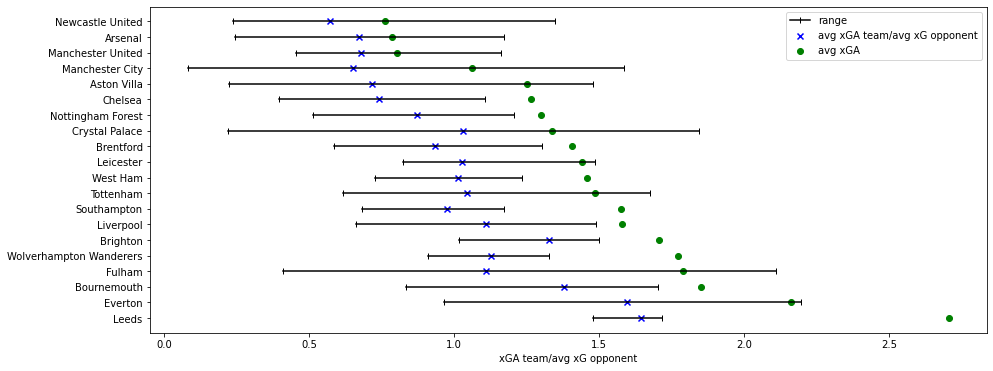

In [18]:
# Plot performance of last few games
plot_performance(fixtures_data.tail(50), teams, metric = 'defense', savefig = True)

c:\Users\dbang\AppData\Local\Programs\Python\Python37\lib\site-packages\ipykernel_launcher.py:25: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations


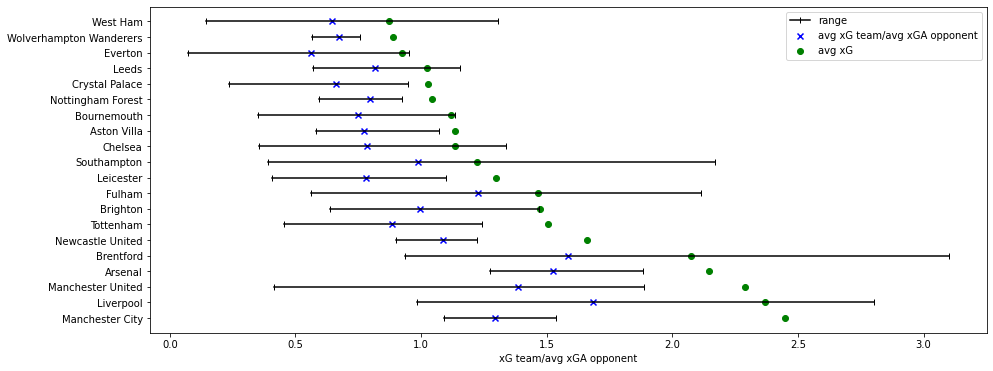

In [19]:
plot_performance(fixtures_data.tail(50), teams, metric = 'attack', savefig = True)

In [67]:
check_post_data.shape

(191, 9)

In [68]:
def get_next_fixtures(check_post_data, fixtures_data, teams, next_games = 5):
    rem_fixtures = check_post_data 
    teams_attack = {}
    teams_defense = {}
    next_fixtures = {}
    for team in teams:
        teams_attack[team] = []
        teams_defense[team] = []
        next_fixtures[team] = []

    for idx, row in rem_fixtures.iterrows():
        a = row['h']
        b = row['a']
        if (len(next_fixtures[a])>=next_games) or (len(next_fixtures[b])>=next_games):
            break
        
        next_fixtures[a].append(b)
        next_fixtures[b].append(a)

        a_attack = np.nanmean(get_team_perf(fixtures_data, a, metric = 'attack'))
        b_avg_defense = get_team_avg_perf(fixtures_data, b, metric = 'xGA')

        a_defense = np.nanmean(get_team_perf(fixtures_data, a, metric = 'defense'))
        b_avg_attack = get_team_avg_perf(fixtures_data, b,  metric = 'xG')

        b_attack = np.nanmean(get_team_perf(fixtures_data, b,  metric = 'attack'))
        a_avg_defense = get_team_avg_perf(fixtures_data, a,  metric = 'xGA')

        
        b_defense = np.nanmean(get_team_perf(fixtures_data, b,  metric = 'defense'))
        a_avg_attack = get_team_avg_perf(fixtures_data, a,  metric = 'xG')

        a_attack_1 = min(a_attack*b_avg_defense, b_defense*a_avg_attack)
        a_def_1 = max(a_defense*b_avg_attack, b_attack*a_avg_defense)

        b_attack_1 = min(b_attack*a_avg_defense, a_defense*b_avg_attack)
        b_def_1 = max(a_attack*b_avg_defense, b_defense*a_avg_attack)

        teams_attack[a].append(a_attack_1)
        teams_attack[b].append(b_attack_1)

        teams_defense[a].append(a_def_1)
        teams_defense[b].append(b_def_1)

    return (teams_attack, teams_defense, next_fixtures)


In [69]:
n_next = 5
teams_attack, teams_defense, next_fixtures = get_next_fixtures(check_post_data, fixtures_data, teams, next_games=n_next)

c:\Users\dbang\AppData\Local\Programs\Python\Python37\lib\site-packages\ipykernel_launcher.py:25: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations


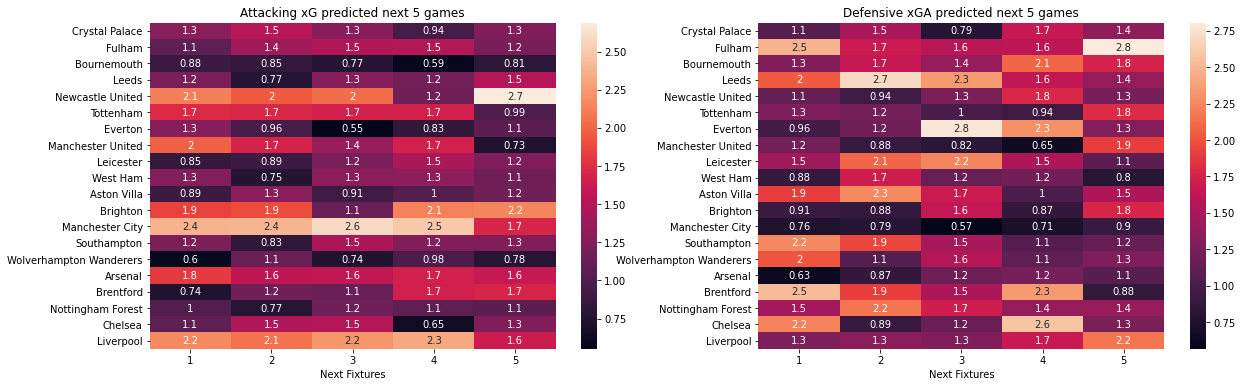

In [20]:
fig, axs = plt.subplots(1, 2, figsize = (20, 6))
attack_teams = np.zeros((len(teams), n_next))
def_teams = np.zeros((len(teams), n_next))

for i, team in enumerate(teams):
    for j in range(len(teams_attack[team])):
        attack_teams[i,j] = teams_attack[team][j] 
        def_teams[i,j] = teams_defense[team][j]

sns.heatmap(attack_teams, annot = True, ax = axs[0])
axs[0].set_yticklabels(teams, rotation = 0)

sns.heatmap(def_teams, annot = True, ax = axs[1])
axs[1].set_yticklabels(teams, rotation = 0)

axs[0].set_xticklabels(np.arange(1, n_next+1))
axs[1].set_xticklabels(np.arange(1, n_next+1))

axs[0].set_xlabel("Next Fixtures")
axs[1].set_xlabel("Next Fixtures")

axs[0].set_title("Attacking xG predicted next {} games".format(n_next))
axs[1].set_title("Defensive xGA predicted next {} games".format(n_next))

#plt.savefig("Simple Predicted Performance teams.png")
plt.show()

In [21]:
next_fixtures['West Ham']

['Leicester', 'Arsenal', 'Brentford', 'Leeds', 'Wolverhampton Wanderers']

### Teams data

In [20]:
with open('teams_data.json','r') as f:
    teams_data_json = json.load(f)
type(teams_data_json)

dict

In [21]:
data = {'Team':[],
        'MP':[],
        'xG':[],
        'npxG':[], 
        'xGA':[], 
        'npxGA':[], 
        'PPDA':[],
        'OPPDA':[],
        'DC':[],
        'ODC':[],
        'pts':[], 
        }


for t in teams_data_json.values():
        data['Team'].append(t['title'])
        n_games = len(t['history'])
        data['MP'].append(n_games)
        data['xG'].append(sum([t['history'][i]['xG'] for i in range(n_games)]))
        data['xGA'].append(sum([t['history'][i]['xGA'] for i in range(n_games)]))
        data['npxG'].append(sum([t['history'][i]['npxG'] for i in range(n_games)]))
        data['npxGA'].append(sum([t['history'][i]['npxGA'] for i in range(n_games)]))
        data['DC'].append(sum([t['history'][i]['deep'] for i in range(n_games)]))
        data['ODC'].append(sum([t['history'][i]['deep_allowed'] for i in range(n_games)])) 
        t1 = np.sum([t['history'][i]['ppda']['att'] for i in range(n_games)])
        t2 = np.sum([t['history'][i]['ppda']['def'] for i in range(n_games)])
        data['PPDA'].append(t1/t2)

        t1 = np.sum([t['history'][i]['ppda_allowed']['att'] for i in range(n_games)])
        t2 = np.sum([t['history'][i]['ppda_allowed']['def'] for i in range(n_games)])
        data['OPPDA'].append(t1/t2)

        data['pts'].append(np.sum([t['history'][i]['pts'] for i in range(n_games)]))

In [22]:
data = pd.DataFrame(data)
data.sort_values(by = "pts", ascending = False, inplace = True)
data.reset_index(inplace = True)
data

,index,Team,MP,xG,npxG,xGA,npxGA,PPDA,OPPDA,DC,ODC,pts
0,9,Arsenal,17,35.623914,34.862744,14.953487,12.669970,9.902235,14.112805,189,72,44
1,12,Manchester City,17,38.988330,36.704830,14.338207,12.815864,10.764151,24.904215,229,58,39
2,10,Newcastle United,18,33.937981,31.654478,19.250641,18.489474,10.208651,11.048338,176,107,35
3,13,Manchester United,17,29.406242,28.645068,19.087049,18.325875,12.774510,14.693103,162,118,35
4,8,Tottenham,18,29.205612,26.922098,22.322946,21.561782,13.110092,15.706897,127,136,33
5,15,Fulham,19,27.750792,23.183773,37.577267,35.293753,14.253406,11.642458,96,133,31
6,11,Liverpool,17,37.216551,37.216551,27.750032,25.466519,10.400000,21.444853,198,105,28
7,14,Brighton,17,29.566342,27.282828,22.165210,17.510197,10.711765,15.294872,151,106,27
8,17,Brentford,18,29.316137,26.271484,26.761741,26.000571,12.194611,9.633238,102,168,26
9,6,Chelsea,18,22.991456,21.469112,25.725252,25.725252,9.017327,14.189119,125,88,25


In [23]:
data.to_csv("teams_data_stats.csv", index = False)

In [24]:
data['xG90'] = data['xG']/data['MP']
data['xGA90'] = data['xGA']/data['MP']

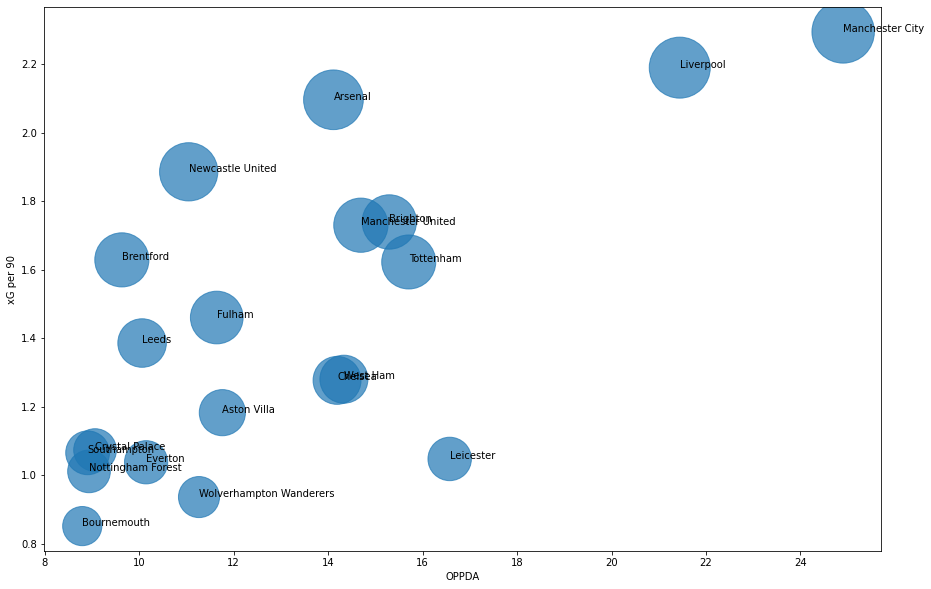

In [25]:
fig = plt.figure(figsize = (15, 10))
plt.scatter(data['OPPDA'], data['xG90'], s = 100*data['xG'], alpha = 0.7)
plt.xlabel("OPPDA")
plt.ylabel("xG per 90")
for idx, row in data.iterrows():
    plt.text(row['OPPDA'], row['xG90'], row['Team'])

plt.savefig('plots/oppda_vs_xg90.png')

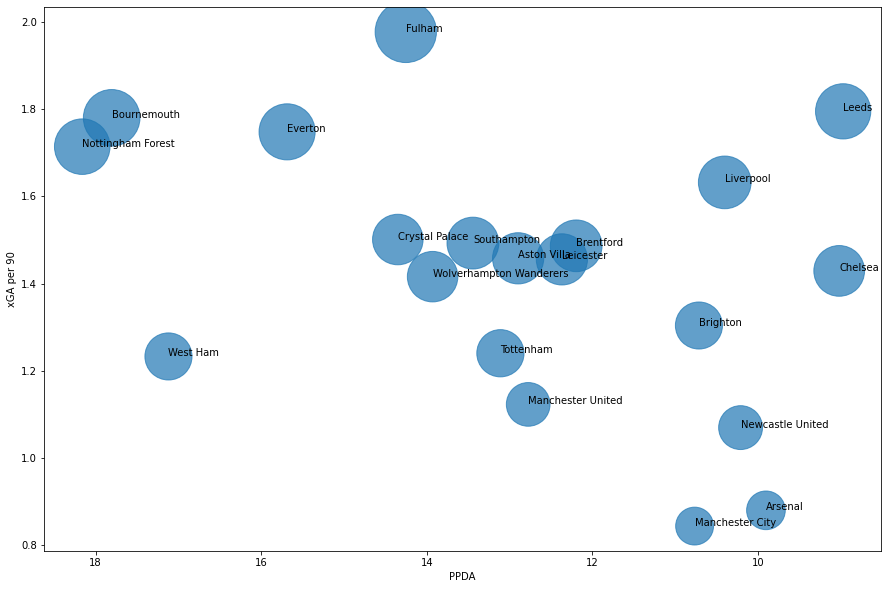

In [26]:
fig = plt.figure(figsize = (15, 10))
plt.gca().invert_xaxis()
plt.scatter(data['PPDA'], data['xGA90'], s = 100*data['xGA'], alpha = 0.7)
plt.xlabel("PPDA")
plt.ylabel("xGA per 90")
for idx, row in data.iterrows():
    plt.text(row['PPDA'], row['xGA90'], row['Team'])

plt.savefig('plots/ppda_vs_xga90.png')

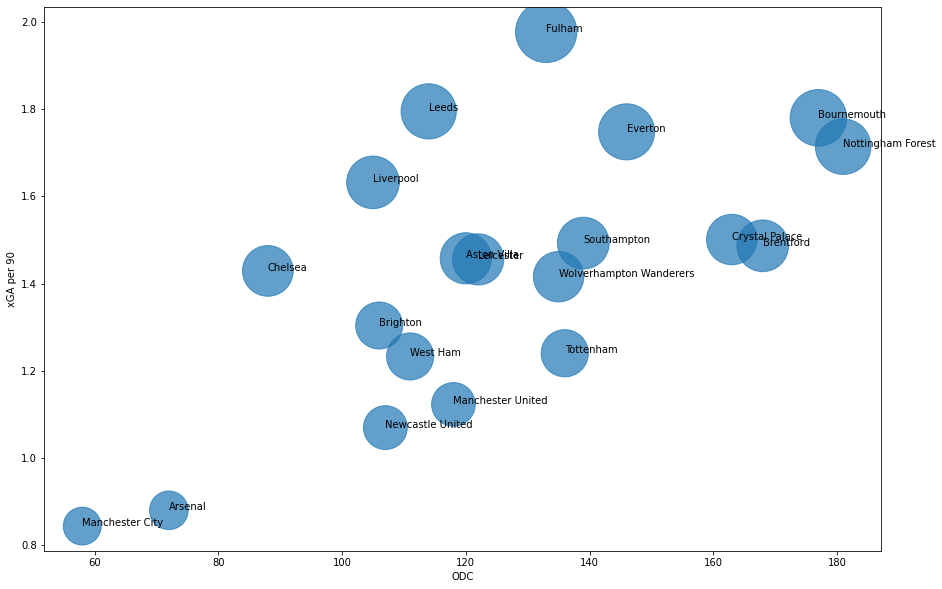

In [27]:
fig = plt.figure(figsize = (15, 10))
plt.scatter(data['ODC'], data['xGA90'], s = 100*data['xGA'], alpha = 0.7)
plt.xlabel("ODC")
plt.ylabel("xGA per 90")
for idx, row in data.iterrows():
    plt.text(row['ODC'], row['xGA90'], row['Team'])

plt.savefig('plots/odc_vs_xga90.png')

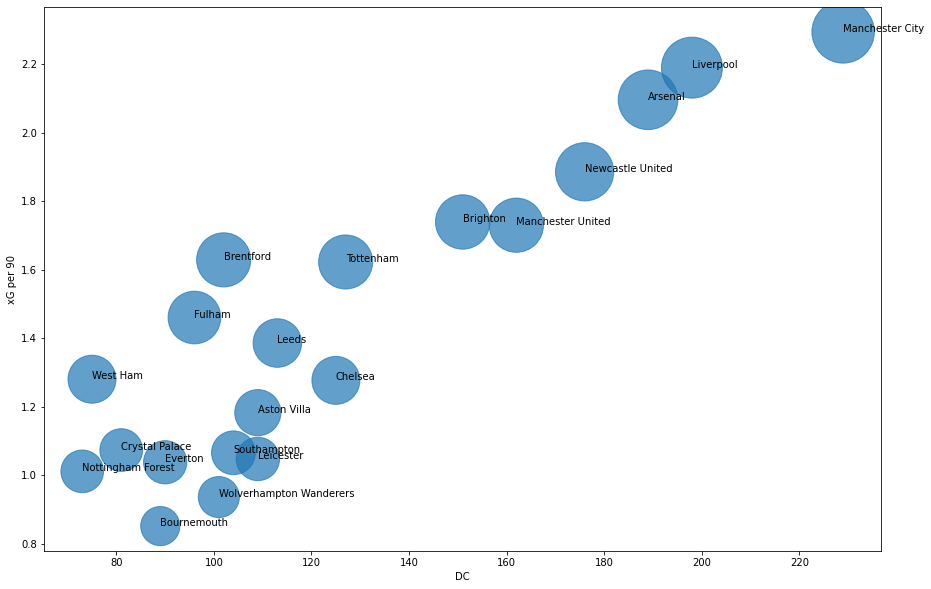

In [28]:
fig = plt.figure(figsize = (15, 10))

plt.scatter(data['DC'], data['xG90'], s = 100*data['xG'], alpha = 0.7)
plt.xlabel("DC")
plt.ylabel("xG per 90")
for idx, row in data.iterrows():
    plt.text(row['DC'], row['xG90'], row['Team'])

plt.savefig('plots/dc_vs_xg90.png')

## Players data

In [28]:
with open('players_data.json','r') as f:
    players_data_json = json.load(f)
type(players_data_json)

list

In [29]:
data = pd.DataFrame(players_data_json)
data

,id,player_name,games,time,goals,xG,assists,xA,shots,key_passes,yellow_cards,red_cards,position,team_title,npg,npxG,xGChain,xGBuildup
0,8260,Erling Haaland,16,1324,21,15.81395536661148,3,3.7190108709037304,65,16,3,0,F S,Manchester City,18,13.530448451638222,15.309691175818443,0.9555932022631168
1,647,Harry Kane,18,1614,15,11.978790000081062,1,3.968278127722442,67,31,4,0,F,Tottenham,13,9.695286959409714,11.282305717468262,1.8231127001345158
2,998,Ivan Toney,16,1440,12,13.103710416704416,3,2.5922609716653824,47,16,6,0,F,Brentford,9,10.820209041237831,11.378091908991337,2.378428416326642
3,773,Aleksandar Mitrovic,15,1289,11,10.711970999836922,1,2.1433414667844772,69,12,5,0,F,Fulham,8,6.906124921515584,9.421914407983422,2.2047208789736032
4,2381,Rodrigo,16,1158,10,6.685381829738617,1,1.8067967044189572,46,11,2,0,F M S,Leeds,9,5.924212828278542,6.834499478340149,1.1275691064074636
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
478,11231,Ben Doak,1,1,0,0,0,0,0,0,0,0,S,Liverpool,0,0,0,0
479,11232,Thomas Cannon,2,15,0,0.050507400184869766,0,0.0708136036992073,1,1,0,0,S,Everton,0,0.050507400184869766,0.050507400184869766,0
480,11233,Dexter Lembikisa,1,20,0,0,0,0,0,0,0,0,S,Wolverhampton Wanderers,0,0,0.014924800023436546,0.014924800023436546
481,11242,Divin Mubama,1,1,0,0,0,0,0,0,0,0,S,West Ham,0,0,0,0


In [30]:
data.to_csv("Players_data_stats.csv", index = False)

In [31]:
data.columns

Index(['id', 'player_name', 'games', 'time', 'goals', 'xG', 'assists', 'xA',
       'shots', 'key_passes', 'yellow_cards', 'red_cards', 'position',
       'team_title', 'npg', 'npxG', 'xGChain', 'xGBuildup'],
      dtype='object')